In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

# Reading Files

In [2]:
os.chdir('E:/Data/uberdrives')
data=pd.read_csv('Uber Request Data.csv')
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# Checking for any Missing values or errors in DataTypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

# Overviewing the distribution of data

In [6]:
data['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [7]:
data['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [8]:
data[data.Status=='Cancelled'].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN


# Cleaning Data

In [9]:
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'])
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'])

In [10]:
data['Request timeOfDay'] = data['Request timestamp'].dt.time
data['Request Date'] = data['Request timestamp'].dt.date
data['Request wkOfDay'] = data['Request timestamp'].dt.date.apply(lambda x: calendar.day_name[x.weekday()])

In [11]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timeOfDay,Request Date,Request wkOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,2016-11-07,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,2016-11-07,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,2016-12-07,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,2016-12-07,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday


In [12]:
#data=data.groupby(by=['Request Date','Status'])

# Analysing Supply and Demand Over Weekdays

In [13]:
data['No of Requests'] = 1
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timeOfDay,Request Date,Request wkOfDay,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,2016-11-07,Monday,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,2016-11-07,Monday,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,2016-12-07,Wednesday,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,2016-12-07,Wednesday,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday,1


Text(0.5,1,'Average Uber Supply Demand Analysis per the day of Week')

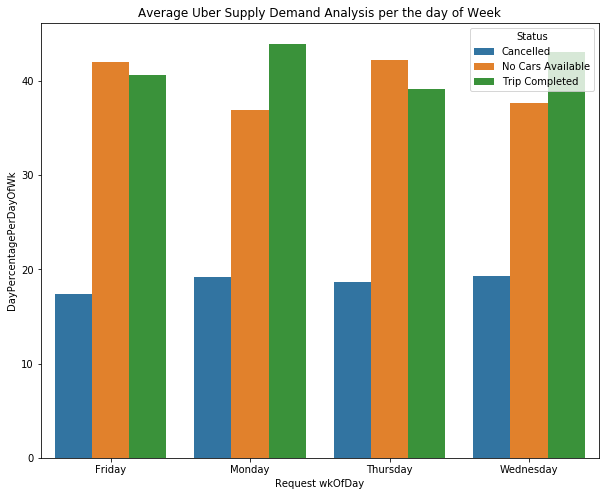

In [14]:
datagrp = data.groupby(by = ['Request wkOfDay', 'Status'])['No of Requests'].count().reset_index()


reqPrcntageList = list()
for x in datagrp.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(datagrp.loc[x, 'No of Requests'] * 100 /  sum(datagrp['No of Requests'].loc[datagrp['Request wkOfDay'] == datagrp.loc[x, 'Request wkOfDay']]), 2))

datagrp['DayPercentagePerDayOfWk'] = reqPrcntageList
plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentagePerDayOfWk', hue = 'Status', data = datagrp)
plt.title('Average Uber Supply Demand Analysis per the day of Week')

### Things that can be concluded from the plot above:

#### (i) The Cancelled trip percentage if not varying with the weekday, and is consistently below 20%.
#### (ii) Friday and Thursday has the least cars availability percentage.
#### (iii) Monday and wednesday has the most trips completed successfully.


In [15]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timeOfDay,Request Date,Request wkOfDay,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,2016-11-07,Monday,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,2016-11-07,Monday,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,2016-12-07,Wednesday,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,2016-12-07,Wednesday,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,2016-07-13,Wednesday,1


# Analysing Supply-Demand over Weekdays - From City to Airport


Text(0,0.5,'Avg calcuations per day')

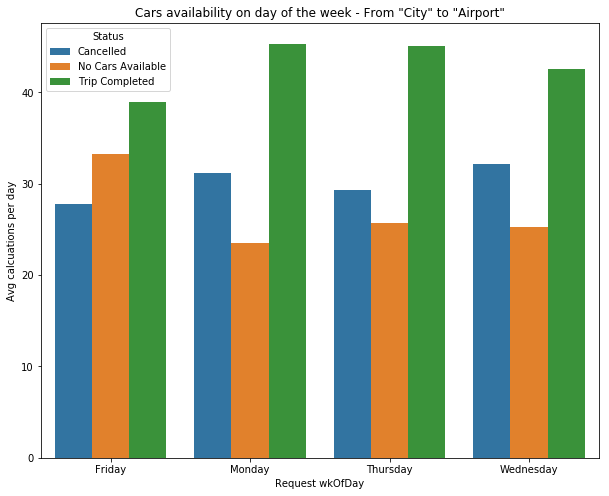

In [17]:
datagrp = data.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
datagrpCity = datagrp.loc[datagrp['Pickup point'] == 'City'].reset_index()

reqPrcntageList = list()
for x in datagrpCity.index:
    reqPrcntageList.append(round(datagrpCity.loc[x, 'No of Requests'] * 100 /  sum(datagrpCity['No of Requests'].loc[datagrpCity['Request wkOfDay'] == datagrpCity.loc[x, 'Request wkOfDay']]), 2))

datagrpCity['DayPercentage'] = reqPrcntageList
datagrpCity

plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = datagrpCity)
plt.title('Cars availability on day of the week - From "City" to "Airport"')
plt.ylabel('Avg calcuations per day')

# Analysing Supply-Demand over Weekdays - From Airport to City

Text(0,0.5,'Avg calcuations per day')

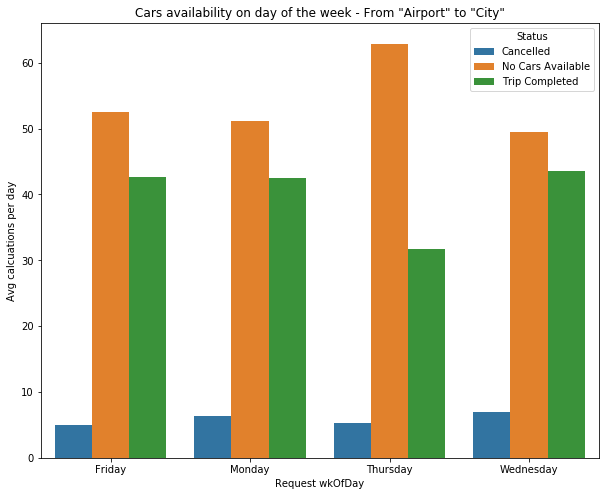

In [20]:
datagrp = data.groupby(by = ['Request wkOfDay', 'Status', 'Pickup point'])['No of Requests'].count().reset_index()
datagrpAirport = datagrp.loc[datagrp['Pickup point'] == 'Airport'].reset_index()

reqPrcntageList = list()
for x in datagrpAirport.index:
    #reqPrcntageList.append(sum(dfGrp['No of Requests'].loc[dfGrp['Request Date'] == dfGrp.loc[x, 'Request Date']]))
    reqPrcntageList.append(round(datagrpAirport.loc[x, 'No of Requests'] * 100 /  sum(datagrpAirport['No of Requests'].loc[datagrpAirport['Request wkOfDay'] == datagrpAirport.loc[x, 'Request wkOfDay']]), 2))

datagrpAirport['DayPercentage'] = reqPrcntageList
datagrpAirport

plt.figure(figsize=(10,8))
sns.barplot(x = 'Request wkOfDay', y = 'DayPercentage', hue = 'Status', data = datagrpAirport)
plt.title('Cars availability on day of the week - From "Airport" to "City"')
plt.ylabel('Avg calcuations per day')

### Conclusions from the abover plots
#### (i) Trips are being Cancelled from City to Airport much more than Airport to City
#### (ii) Also, there are more completed trips from City to Airport
#### (iii) Cars Unavailability is a big issue for City to Airport

# Analysing Supply Demand throughout the day

Text(0,0.5,'Total number of orders')

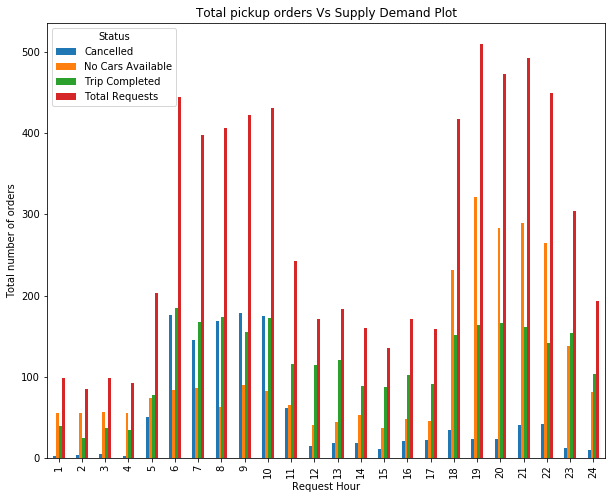

In [21]:
data['Request Hour'] = data['Request timestamp'].dt.hour + 1
datagrp = data.groupby(by = ['Status', 'Request Hour'])['No of Requests'].count().unstack()

datagrp = datagrp.T
datagrp['Total Requests'] = datagrp['Cancelled'] + datagrp['No Cars Available'] + datagrp['Trip Completed']
datagrp.plot(kind = 'bar', figsize=(10,8))
plt.title('Total pickup orders Vs Supply Demand Plot')
plt.ylabel('Total number of orders')

Text(0.5,1,'Exact Supply Demand Gap')

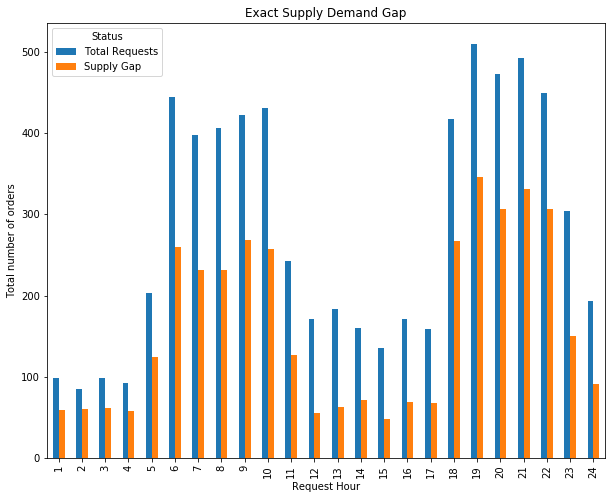

In [22]:
datagrp['Supply Gap'] = datagrp['Total Requests'] - datagrp['Trip Completed']
datagrpSubSet = datagrp.loc[:, ['Total Requests', 'Supply Gap']]
datagrpSubSet.plot(kind = 'bar', figsize=(10,8))
plt.ylabel('Total number of orders')
plt.title('Exact Supply Demand Gap')

### Conclusion from the above plots:
#### (i)  Most number of Pickup orders are received from 4AM onwards till 11AM; and then 5AM onwards till 11PM
#### (ii)  In morning high peak time slot, we have more number of Cancellations and have same level number of Successful Trips too.
#### (iii) Whereas in evening high peak time slot, we have more cars unavailability whereas Successful trips are being maintained at steady level throughout the hours of day